In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, Math, Latex
from utils import Answer

# Лабораторная работа №1
## Задание 2
### {Фамилия Имя}, {Номер группы}, Вариант {Номер варианта}, ({Дата})

### Задание

По данным выборки ($n=150$) требуется:
1. Составить вариационный ряд и список вариантов.
2. Составить ряд распределения частот вариационного ряда и построить полигон частот.
3. Составить ряд распределения относительных частот вариационного ряда и построить полигон относительных частот.
4. Составить эмпирическую функцию распределения и построить график эмпирической функции распределения.
5. Найти основные числовые характеристики вариационного ряда:
    - Выборочное среднее - $\overline x_в$
    - Выборочную дисперсию - $S^2$
    - Стандартное отклонение (Среднеквадратическое отклонение) - $S$
    - Коэффициент вариации - $CV$
6. Пояснить смысл полученных результатов

### Данные

In [27]:
LB_NUM = 1
LB_SURNAME = 'Фамилия'
LB_NAME = "Имя"
LB_VARIANT = 59
LB_EXERCISE_NUM = 2
print(f'Фамилия, Имя: {LB_SURNAME}, {LB_NAME}\nНомер лабораторной работы: {LB_NUM}\nВариант лабораторной работы: {LB_VARIANT}\nНомер задания лабораторной работы: {LB_EXERCISE_NUM}')

Фамилия, Имя: Фамилия, Имя
Номер лабораторной работы: 1
Вариант лабораторной работы: 59
Номер задания лабораторной работы: 2


In [28]:
task = pd.read_json('input/Данные к заданию №2.json')
data = pd.Series(task['Данные'][LB_VARIANT - 1])
print(data.tolist())

[3, 1, 4, 5, 0, 5, 4, 0, 2, 4, 3, 2, 3, 3, 2, 0, 6, 2, 3, 4, 2, 4, 2, 4, 3, 3, 3, 2, 0, 6, 1, 2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 6, 0, 2, 4, 3, 2, 1, 6, 2, 2, 1, 2, 3, 2, 2, 4, 3, 1, 4, 5, 3, 4, 3, 1, 0, 2, 5, 3, 3, 1, 6, 2, 4, 5, 2, 4, 2, 4, 3, 4, 3, 1, 4, 5, 3, 0, 2, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 0, 2, 5, 3, 3, 3, 3, 2, 0, 6, 2, 3, 1, 5, 2, 4, 2, 4, 3, 1, 2, 3, 2, 2, 2, 3, 4, 1, 6, 2, 3, 3, 2, 0, 6, 2, 5, 0, 2, 4, 3, 2, 6, 0, 2, 5, 3, 3, 3, 5, 4, 3]


### Всего элементов ряда

In [29]:
data_len = data.count()
print(f'Всего элементов ряда: {data_len}')

Всего элементов ряда: 150


## Пункт 1
**Составить вариационный ряд и список вариантов.**

### Вариационный ряд

In [30]:
data_sort = data.sort_values()
print(data_sort.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6]


### Варианты, $x_i$

In [31]:
unique = sorted(data.unique())
print(unique)

[0, 1, 2, 3, 4, 5, 6]


## Пункт 2
**Составить ряд распределения частот вариационного ряда и построить полигон частот.**

### Частота, $n_i$

In [32]:
freq = pd.Series(data_sort).value_counts().sort_index()
freq = pd.DataFrame(freq, index=unique, columns=["Частота"]).T
freq

,0,1,2,3,4,5,6
Частота,13,13,40,41,23,11,9


### Полигон частот вариационного ряда

In [33]:
fig = px.line(x=unique, y=freq.iloc[0], markers=True, title='Полигон частот вариационного ряда')
fig.show()

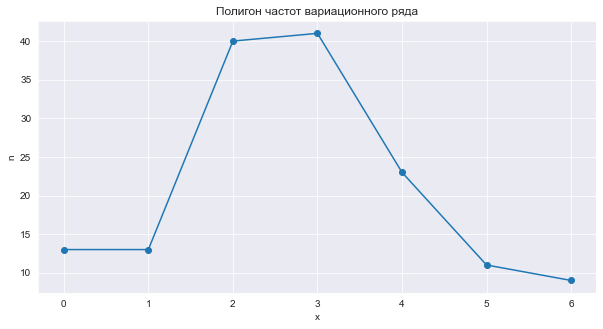

In [34]:
def plot_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("n")
    plt.plot()


plot_freq_polygon(x=unique, y=freq.iloc[0], title='Полигон частот вариационного ряда')

## Пункт 3
**Составить ряд распределения относительных частот вариационного ряда и построить полигон относительных частот.**

### Относительная частота, $w_i$

In [35]:
rel_freq = pd.Series(data_sort).value_counts().sort_index() / len(data_sort)
rel_freq = pd.DataFrame(rel_freq, index=unique, columns=["Относительная частота"]).T
rel_freq

,0,1,2,3,4,5,6
Относительная частота,0.086667,0.086667,0.266667,0.273333,0.153333,0.073333,0.06


### Полигон относительных частот вариационного ряда


In [36]:
fig = px.line(x=unique, y=rel_freq.iloc[0], markers=True, title='Полигон относительных частот вариационного ряда')
fig.show()

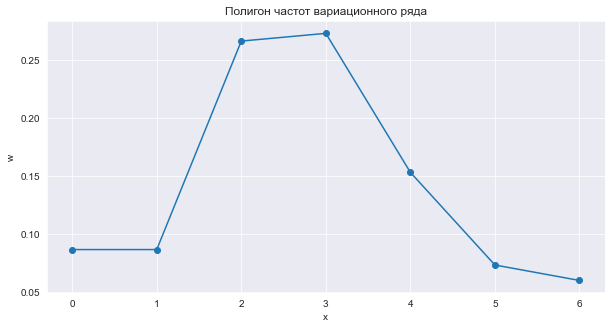

In [37]:
def plot_rel_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("w")
    plt.plot()


plot_rel_freq_polygon(x=unique, y=rel_freq.iloc[0], title='Полигон частот вариационного ряда')

## Пункт 4
**Составить эмпирическую функцию распределения и построить график эмпирической функции распределения.**

### Эмпирическая функция распределения $F^*$

In [38]:
emp_func = rel_freq.iloc[0].cumsum()
emp_func.name = "F*"
emp_func = pd.DataFrame(emp_func, index=unique).T
emp_func

,0,1,2,3,4,5,6
F*,0.086667,0.173333,0.44,0.713333,0.866667,0.94,1.0


In [39]:
def emp_func_latex(emp_func):
    latex_text = f'$$\nF^* (x) =\n\\begin{{cases}}\n'
    for i in range(len(emp_func.values.tolist()[0])):
        if i == 0:
            latex_text += f'0, && x \le {unique[0]:.2f} \\\\'
        elif i == len(emp_func.values.tolist()[0]) - 1:
            latex_text += f'{emp_func.values.tolist()[0][i - 1]:.2f}, && {unique[i - 1]:.2f} < x \le {unique[i]:.2f} \\\\'
            latex_text += f'1.0, && x > {unique[i]:.2f} \\\\'
        else:
            latex_text += f'{emp_func.values.tolist()[0][i - 1]:.2f}, && {unique[i - 1]:.2f} < x \le {unique[i]:.2f} \\\\'
        latex_text += "\n"
    latex_text += '\\end{cases}\n$$'
    return Math(latex_text) 


display(emp_func_latex(emp_func))

<IPython.core.display.Math object>

### График эмпирической функции распределения

In [40]:
fig = px.ecdf(x=unique, y=emp_func.values.tolist()[0], markers=True, title='График эмпирической функции распределения')
fig.show()

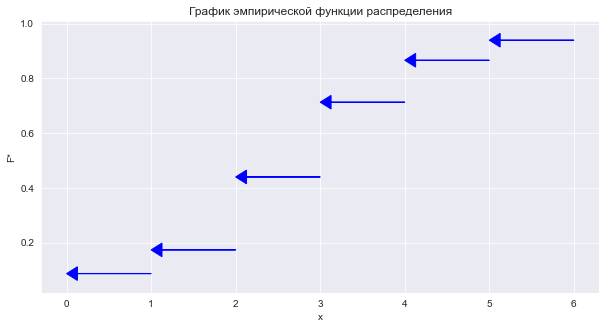

In [55]:
def plot_cdf_func(x, y, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    min_y, max_y = min(y), max(y)
    arrow_length = ((max(x) - min(x)) / len(x)) * .15
    for idx in range(len(y) - 1):
        dx = x[idx] - x[idx + 1]
        ax.arrow(x=x[idx + 1], y=y[idx], dx=dx, dy=0, 
                 color="blue", head_width=.05, head_length=arrow_length,
                 length_includes_head=True)
    ax.set_title(title)
    ax.set_ylabel("F*")
    ax.set_xlabel("x")
    plt.plot()


plot_cdf_func(unique, emp_func.iloc[0].tolist(), 'График эмпирической функции распределения')

## Пункт 5
**Найти основные числовые характеристики вариационного ряда**

### Выборочное среднее, $\overline x$

$$\overline x = \frac1n \sum^n_{i=1} x_i$$

In [42]:
mean = np.mean(data)
print(f'Выборочное среднее: {mean:.2f}')

Выборочное среднее: 2.78


### Выборочная дисперсия, $s^2_x$

$$s^2_x = \frac{1}{n-1}\sum^n_{i=1} (x_i - \overline x)^2$$

In [43]:
var = np.var(data, ddof=1)
print(f'Выборочная дисперсия: {var:.2f}')

Выборочная дисперсия: 2.35


### Стандартное отклонение (Среднеквадратическое отклонение), $s_x$

$$s_x = \sqrt{s^2}$$

In [44]:
std = np.std(data, ddof=1)
print(f'Среднеквадратическое отклонение: {std:.2f}')

Среднеквадратическое отклонение: 1.53


### Коэффицент вариации, $CV$

$$CV = \frac{s}{\overline x} \cdot 100$$

In [45]:
cv = (std / mean) * 100
cv

55.110547138126265

## Пункт 6
**Пояснить смысл полученных результатов.**

$$\overline x = 2.77$$
$$s^2_x = 2.28$$
$$s = 1.51$$
$$CV = 54.49$$

In [46]:
points = {
    'Вариационный ряд': [str(data_sort.tolist())],
    'Варианты': [str(unique)],
    'Частота': [str(freq.values.tolist()[0])],
    'Относительная частота': [str(rel_freq.values.tolist()[0])],
    'Эмпирическая функция распределения': [str(emp_func.values.tolist()[0])],
    'Выборочное среднее': [mean],
    'Выборочная дисперсия': [var],
    'Среднеквадратическое отклонение': [std],
    'Коэффицент вариации': [cv]
}

answer = Answer(LB_NAME, LB_SURNAME, LB_NUM, LB_VARIANT, LB_EXERCISE_NUM)
answer.fill(**points)
answer.answer

,"Фамилия, Имя",Номер лабораторной работы,Вариант лабораторной работы,Номер задания лабораторной работы,Вариационный ряд,Варианты,Частота,Относительная частота,Эмпирическая функция распределения,Выборочное среднее,Выборочная дисперсия,Среднеквадратическое отклонение,Коэффицент вариации
0,"Фамилия, Имя",1,59,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6]","[13, 13, 40, 41, 23, 11, 9]","[0.08666666666666667, 0.08666666666666667, 0.2...","[0.08666666666666667, 0.17333333333333334, 0.4...",2.78,2.347248,1.532073,55.110547


In [47]:
answer.save()